# Reference

1. Data Science for Fraud Detection: https://blog.codecentric.de/en/2017/09/data-science-fraud-detection/
2. H2o Deep Learning: https://github.com/h2oai/h2o-tutorials/blob/master/tutorials/deeplearning/deeplearning.ipynb
3. Categorical Variable Encoding (python library): https://github.com/scikit-learn-contrib/categorical-encoding
4. Cateforical Variable Encoding: http://pbpython.com/categorical-encoding.html

# Load and Preprocess the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# this will take sevaral seconds
train_fraud = pd.read_csv('data_transactions/train.csv')
test_fraud = pd.read_csv('data_transactions/test.csv')

print('train Shape:', train_fraud.shape, 'test Shape:', test_fraud.shape)

train Shape: (348978, 51) test Shape: (523466, 50)


In [3]:
# drop id column
train_new = train_fraud.copy()
test_new = test_fraud.copy()

sub_ids = test_new.transaction_id

train_new.drop('transaction_id', axis = 1, inplace = True)
test_new.drop('transaction_id', axis = 1, inplace = True)

print('train_new Shape:', train_new.shape, 'test_new Shape:', test_new.shape)

train_new Shape: (348978, 50) test_new Shape: (523466, 49)


# Data Exploration

## Visualize *target* 

As visualized bellow, the fraud detection data is very imbalanced (the number of normal classes is more than the number of fraud classes).

normal(class 0): 0.892922, fraud(class 1): 0.107078


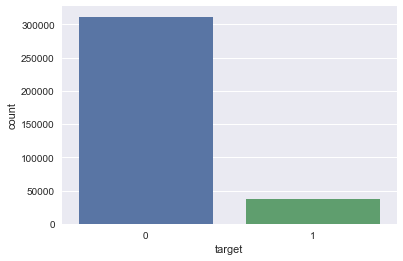

In [4]:
# Let's check the distribution of target variable
# Look at the classes of target variable in percentages
normal, fraud = train_new['target'].value_counts(normalize=True)
print('normal(class 0): %f, fraud(class 1): %f' % (normal, fraud))

ax = sns.countplot("target", data = train_new)

## Visualize Numerical Features

Here is what we are going to do in this section.  
1. Look at the histograms of numerical features (features 1 to 7).
    * For training set
    * For test set
2. Takeaways
3. Playground


### Pairwise relationships of numerical featuers

### Training set

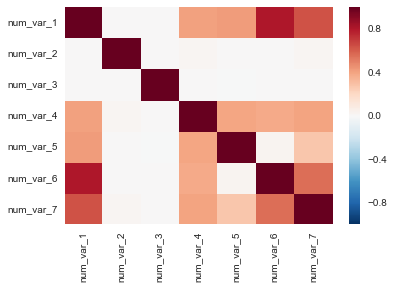

In [5]:
# 1. not so pretty version
# plt.matshow(train_new.iloc[:,:7].corr())  
# 2. prettier version
corr = train_new.iloc[:,:7].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

* **num_var_1** and **num_var_6** are the most correlated features.
* **num_var_1** and **num_var_7** are the second higighly correlated features.
* **num_var_6** and **num_var_7** are the third highly correlated features.
* **num_var_6** and **num_var_5** are not correlated.  
* **num_var_2** and **num_var_3** are not correlated to any of the other numerical variables, nor with the target.

### Test set

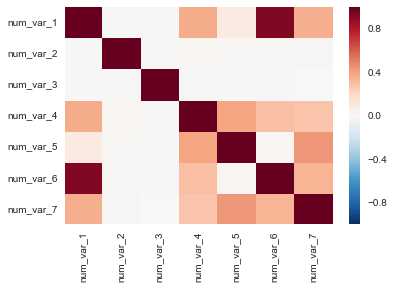

In [6]:
corr = test_new.iloc[:,:7].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Training Set

In [7]:
## numerical feature names
num_vars = [x for x in train_new.columns if 'num_' in x]

# separate fraud and normal numerical columns in two data frames
fraud_num = train_new[train_new.target == 1][num_vars]
normal_num = train_new[train_new.target == 0][num_vars]

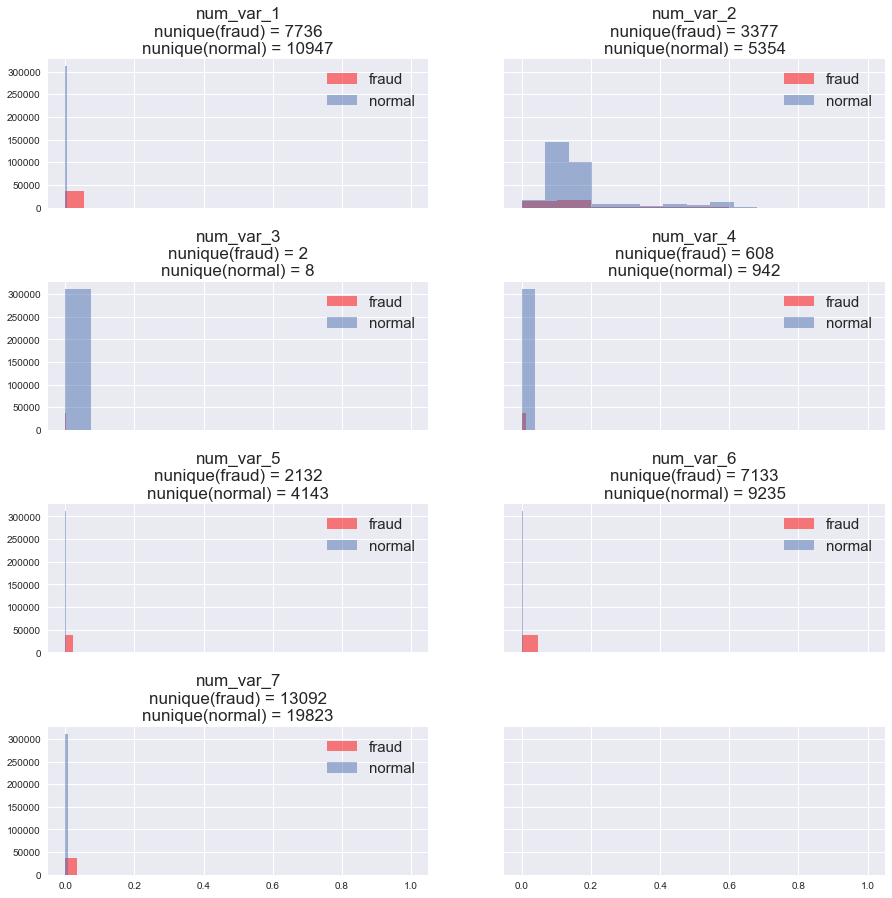

In [7]:
# uncomment the line below and comment out the second line below to see the histograms with the same x and y axes
f, axes = plt.subplots(4, 2, figsize = (15,15), sharex='all', sharey = 'all')
#f, axes = plt.subplots(4, 2, figsize = (15,15))

## notice that feature names start from 1, while the plot count starts from 0.
## there are 4 rows(i) and 2 columns(j) of plots.
for i in [0,1,2,3]:
    for j in [0,1]:
        if 2*i+j+1 > 7:
            break
        axes[i, j].hist(fraud_num['num_var_%s' %(2*i+j+1)], label = 'fraud', alpha = 0.5, color = 'red')
        axes[i, j].hist(normal_num['num_var_%s' %(2*i+j+1)], label = 'normal', alpha = 0.5)
        axes[i, j].legend(loc='upper right', prop={'size': 15})
        axes[i, j].set_title('num_var_%s\nnunique(fraud) = %s\nnunique(normal) = %s' %(2*i+j+1, fraud_num['num_var_%s' %(2*i+j+1)].nunique(), normal_num['num_var_%s' %(2*i+j+1)].nunique()), size=17)

f.subplots_adjust(hspace=0.5)

### Test Set (no labels)

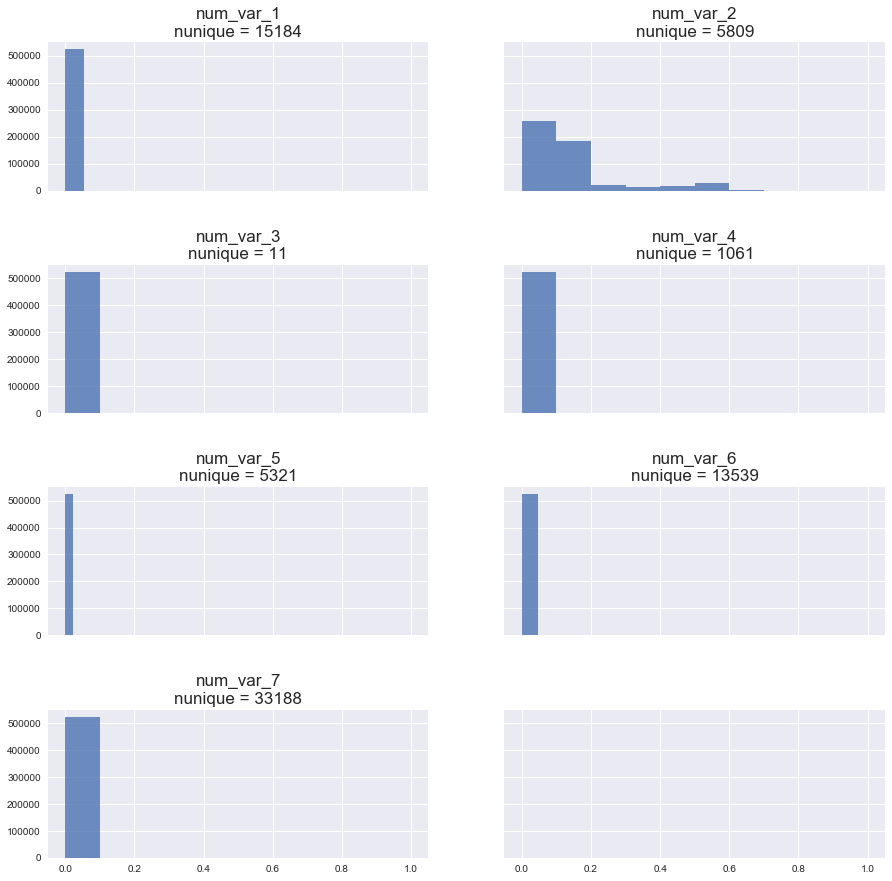

In [8]:
# uncomment the line below and comment out the second line below to see the histograms with the same x and y axes
f, axes = plt.subplots(4, 2, figsize = (15,15), sharex='all', sharey = 'all')
#f, axes = plt.subplots(4, 2, figsize = (15,15))

## notice that feature names start from 1, while the plot count starts from 0.
## there are 4 rows(i) and 2 columns(j) of plots.
for i in [0,1,2,3]:
    for j in [0,1]:
        if 2*i+j+1 > 7:
            break
        axes[i, j].hist(test_new['num_var_%s' %(2*i+j+1)], alpha = 0.8)
        axes[i, j].set_title('num_var_%s\nnunique = %s' %(2*i+j+1, test_new['num_var_%s' %(2*i+j+1)].nunique()), size=17)

f.subplots_adjust(hspace=0.5)

### Takeaways 

1. The distributions of numerical variables are similar in training and test sets, except maybe from num_var_2. It appears that in training set the peak is around 0.1 to 0.2, while in test set the peak is from 0 to 0.2.  

2. Numerical feature 3 has very few unique values. We will treat it as a categorical feature.

### Playground

In [11]:
# Use this code to plot a histogram of only one numerical variable

#plt.hist(fraud_num['num_var_1'], label = 'fraud', alpha = 0.7, color = 'red')
#plt.hist(normal_num['num_var_1'], label = 'normal', alpha = 0.7)
#plt.legend(loc='upper right', prop={'size': 15})
#plt.title('num_var_1\n nunique(fraud) = %s\n nunique(normal) = %s' %(fraud_num['num_var_1'].nunique(), normal_num['num_var_1'].nunique()), size=17)

In [14]:
# Use this place to explore data more

#train_new[num_vars].nunique()
#train_new['num_var_3'].value_counts()
#train_new.groupby(['num_var_3','target']).count()

In [15]:
#test_new[num_vars].nunique()
#test_new['num_var_3'].value_counts()

In [367]:
# make a barplot of one numerical variable

#fraud_num['num_var_2'].value_counts().head(10).plot(kind = 'bar', color='red', label='fraud', alpha=0.5)
#normal_num['num_var_2'].value_counts().head(10).plot(kind = 'bar', label ='normal', alpha = 0.5)
#plt.legend(loc='upper right', prop={'size':15})
#plt.title('num_var_2\n nunique(fraud) = %s\n nunique(normal) = %s' % (fraud_num['num_var_2'].nunique(), normal_num['num_var_2'].nunique()), size = 20)

## Visualize Categorical Features

Here is a summary of what we are going to do in this section.  
1. Look at the barplots of categorical features 1 to 18 (which are of type object).  
    * For training set
    * For test set
2. Look at the barplots of cateforical features 19 to 42 (which are of type int).  
    * For training set
    * For test set
3. Takeaways
4. Playground


In [16]:
# categorical feature names
cat_vars = [x for x in train_new.columns if 'cat_' in x]

# separate fraud and normal categories in two data frames
fraud_cat = train_new[train_new.target == 1][cat_vars]
normal_cat = train_new[train_new.target == 0][cat_vars]

### cat_var_1 to cat_var_18 (dtype object)

### Training Set

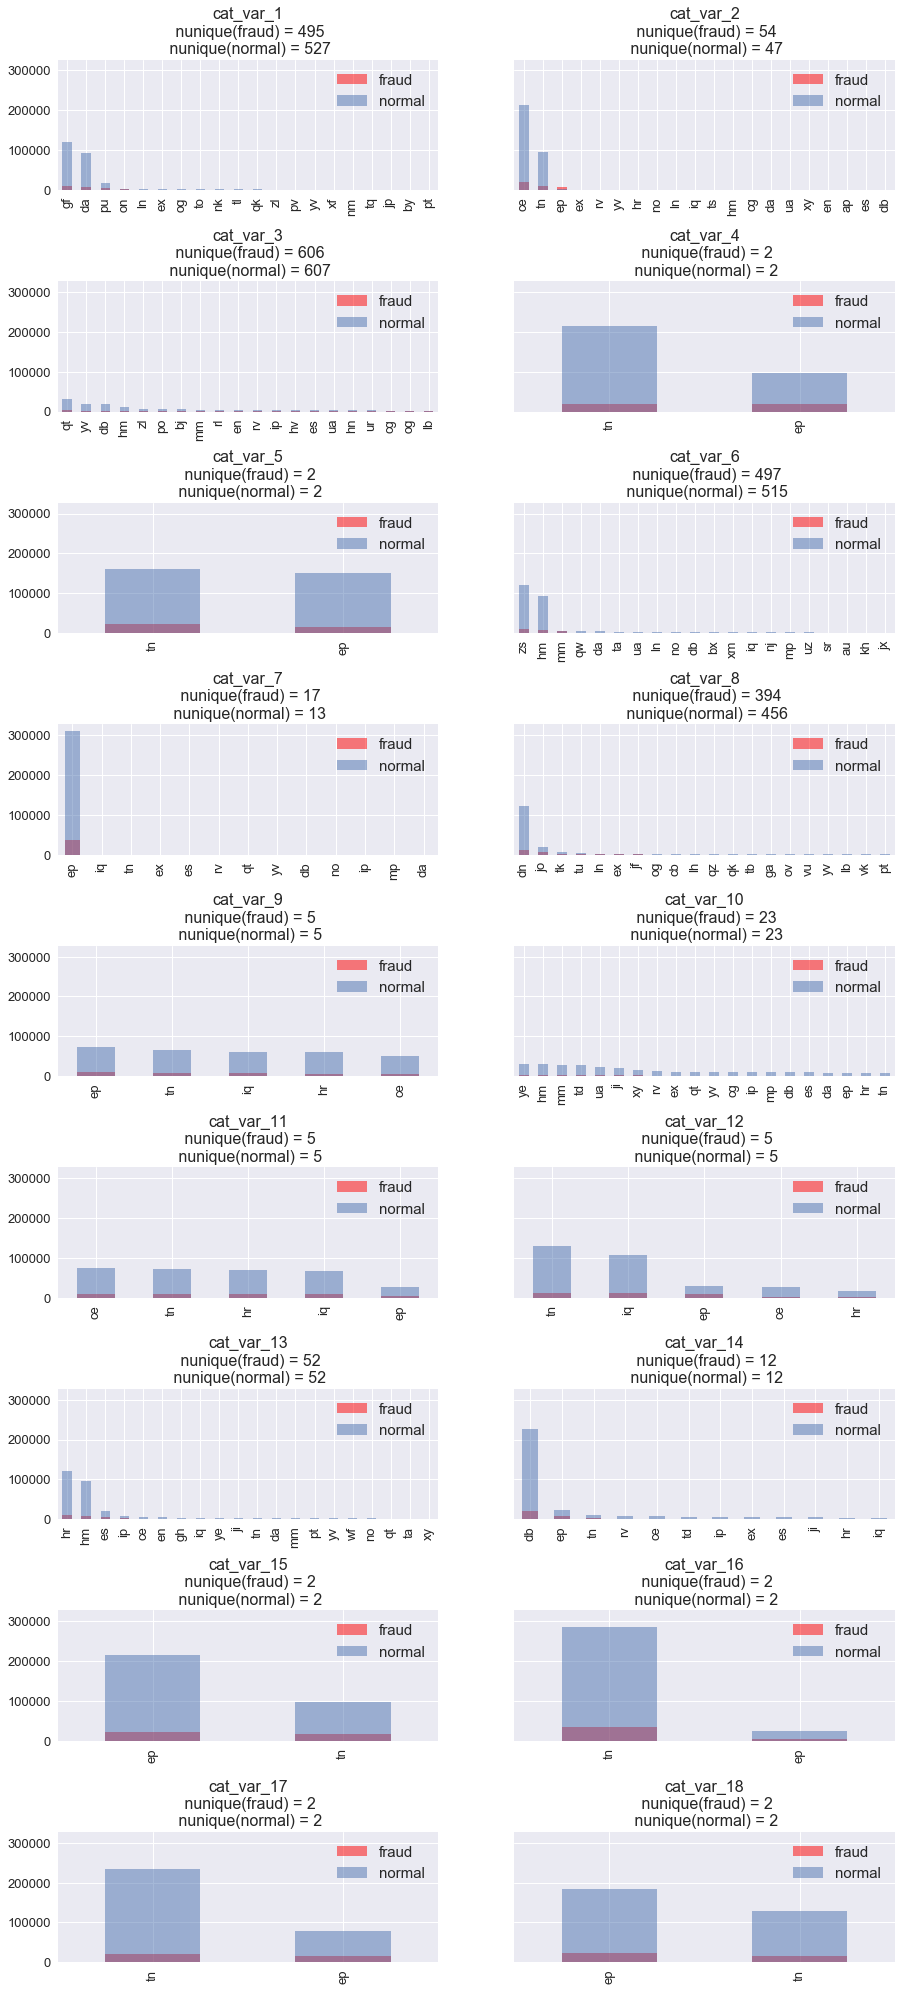

In [18]:
# Plotting the first 20 categories if a feature has more than 20 categories

# uncomment the line below and comment out the second line below to see the bar plots with the same x axes
fig, axes = plt.subplots(9, 2, figsize = (15, 35), sharey='all')
#fig, axes = plt.subplots(9, 2, figsize = (15, 35))   # axes is a numpy array of pyplot Axes

for i in range(0,9):
    for j in [0,1]:
        if 2*i+j+1 > 18:
            break
        fraud_cat['cat_var_%s' %(2*i+j+1)].value_counts().head(20).plot(ax = axes[i,j], kind = 'bar', color='red', label='fraud', alpha=0.5)
        normal_cat['cat_var_%s' %(2*i+j+1)].value_counts().head(20).plot(ax = axes[i,j], kind = 'bar', label ='normal', alpha = 0.5)
        axes[i,j].legend(loc='upper right', prop={'size':15})
        axes[i,j].set_title('cat_var_%s\n nunique(fraud) = %s\n nunique(normal) = %s' %(2*i+j+1, fraud_cat['cat_var_%s' %(2*i+j+1)].nunique(), normal_cat['cat_var_%s' %(2*i+j+1)].nunique()), size = 16)
        axes[i,j].tick_params(axis='both', which='major', labelsize=13)

fig.subplots_adjust(hspace=0.7)

### cat_var_1 to cat_var_18 (dtype obhect)
### Test Set (no labels)

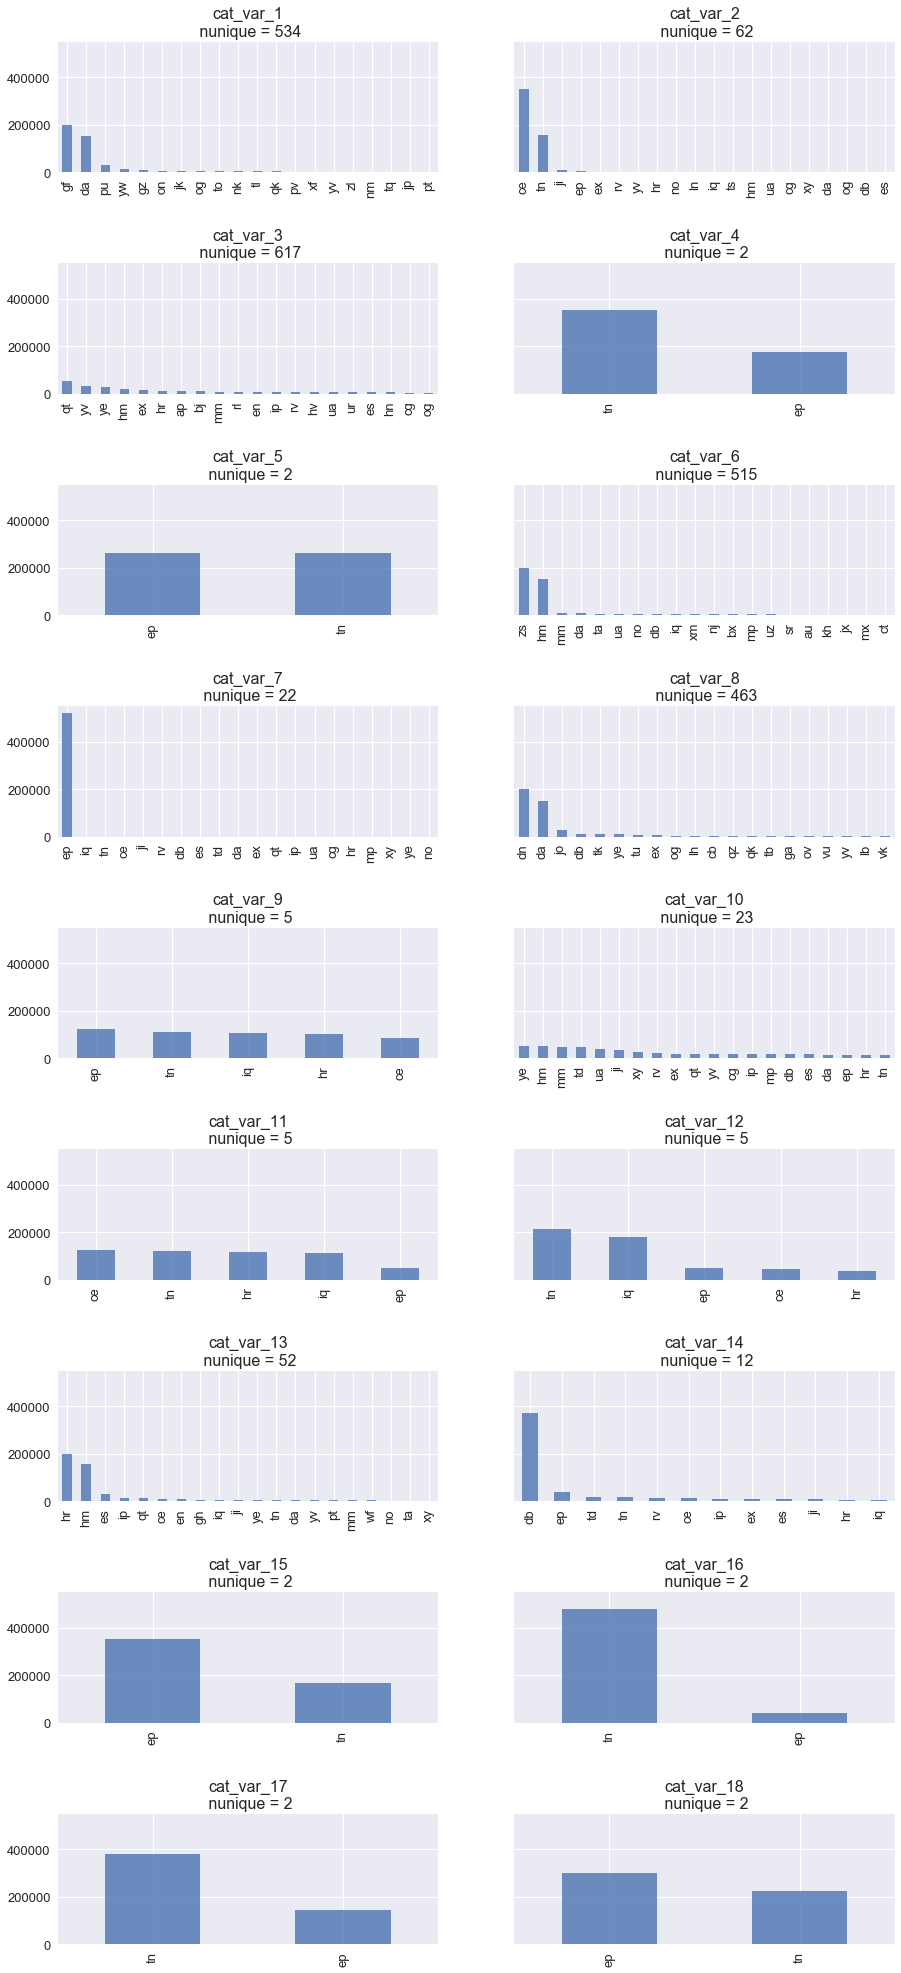

In [19]:
# Plotting the first 20 categories if a feature has more than 20 categories

# uncomment the line below and comment out the second line below to see the bar plots with the same x axes
fig, axes = plt.subplots(9, 2, figsize = (15, 35), sharey='all')
#fig, axes = plt.subplots(9, 2, figsize = (15, 35))   # axes is a numpy array of pyplot Axes

for i in range(0,9):
    for j in [0,1]:
        if 2*i+j+1 > 18:
            break
        test_new['cat_var_%s' %(2*i+j+1)].value_counts().head(20).plot(ax = axes[i,j], kind = 'bar', alpha=0.8)
        axes[i,j].set_title('cat_var_%s\n nunique = %s' %(2*i+j+1, test_new['cat_var_%s' %(2*i+j+1)].nunique()), size = 16)
        axes[i,j].tick_params(axis='both', which='major', labelsize=13)

fig.subplots_adjust(hspace=0.7)

### cat_var_19 to cat_var_42 (dtype int)
### Training Set

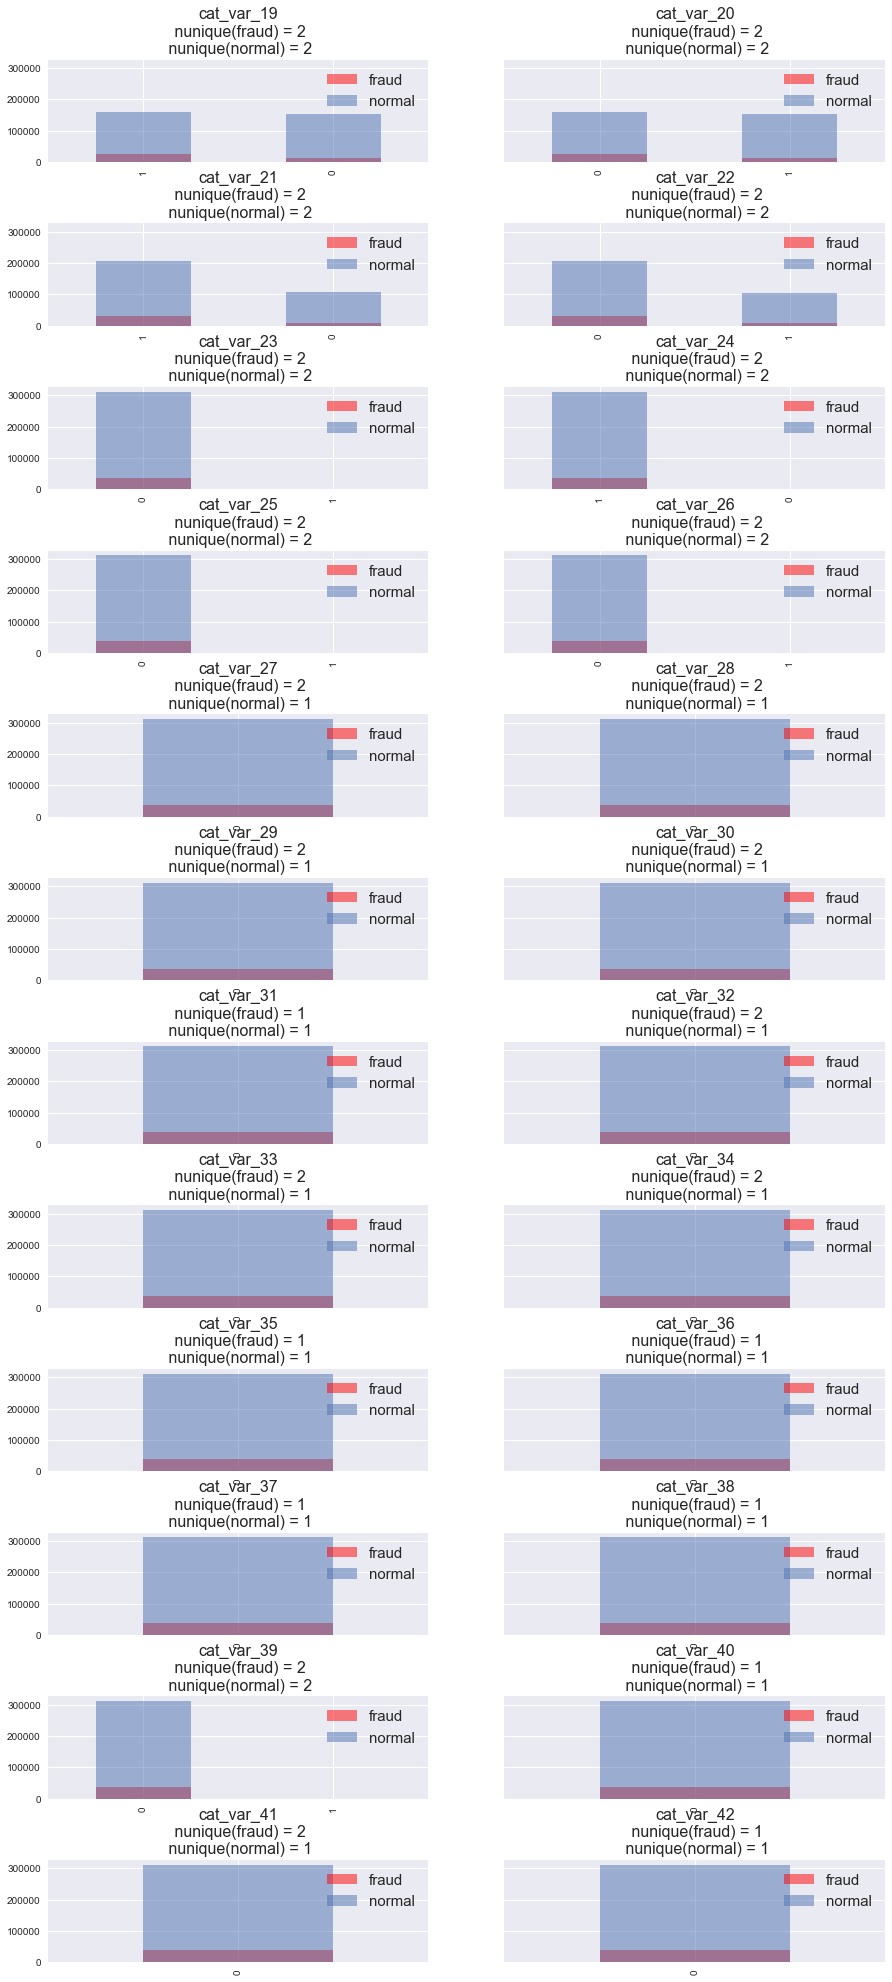

In [20]:
# uncomment the line below and comment out the second line below to see the bar plots with the same y axes
fig, axes = plt.subplots(12, 2, figsize = (15, 35), sharey='all')
#fig, axes = plt.subplots(12, 2, figsize = (15, 35))   # axes is a numpy array of pyplot Axes

for i in range(0,12):
    for j in [0,1]:
        if 18+2*i+j+1 > 42:
            break
        fraud_cat['cat_var_%s' %(18+2*i+j+1)].value_counts().head(20).plot(ax = axes[i,j], kind = 'bar', color='red', label='fraud', alpha=0.5)
        normal_cat['cat_var_%s' %(18+2*i+j+1)].value_counts().head(20).plot(ax = axes[i,j], kind = 'bar', label ='normal', alpha = 0.5)
        axes[i,j].legend(loc='upper right', prop={'size':15})
        axes[i,j].set_title('cat_var_%s\n nunique(fraud) = %s\n nunique(normal) = %s' %(18+2*i+j+1, fraud_cat['cat_var_%s' %(18+2*i+j+1)].nunique(), normal_cat['cat_var_%s' %(18+2*i+j+1)].nunique()), size = 16)

fig.subplots_adjust(hspace=0.6)

### cat_var_19 to cat_var_42 (dtype int)
### Test Set (no labels)

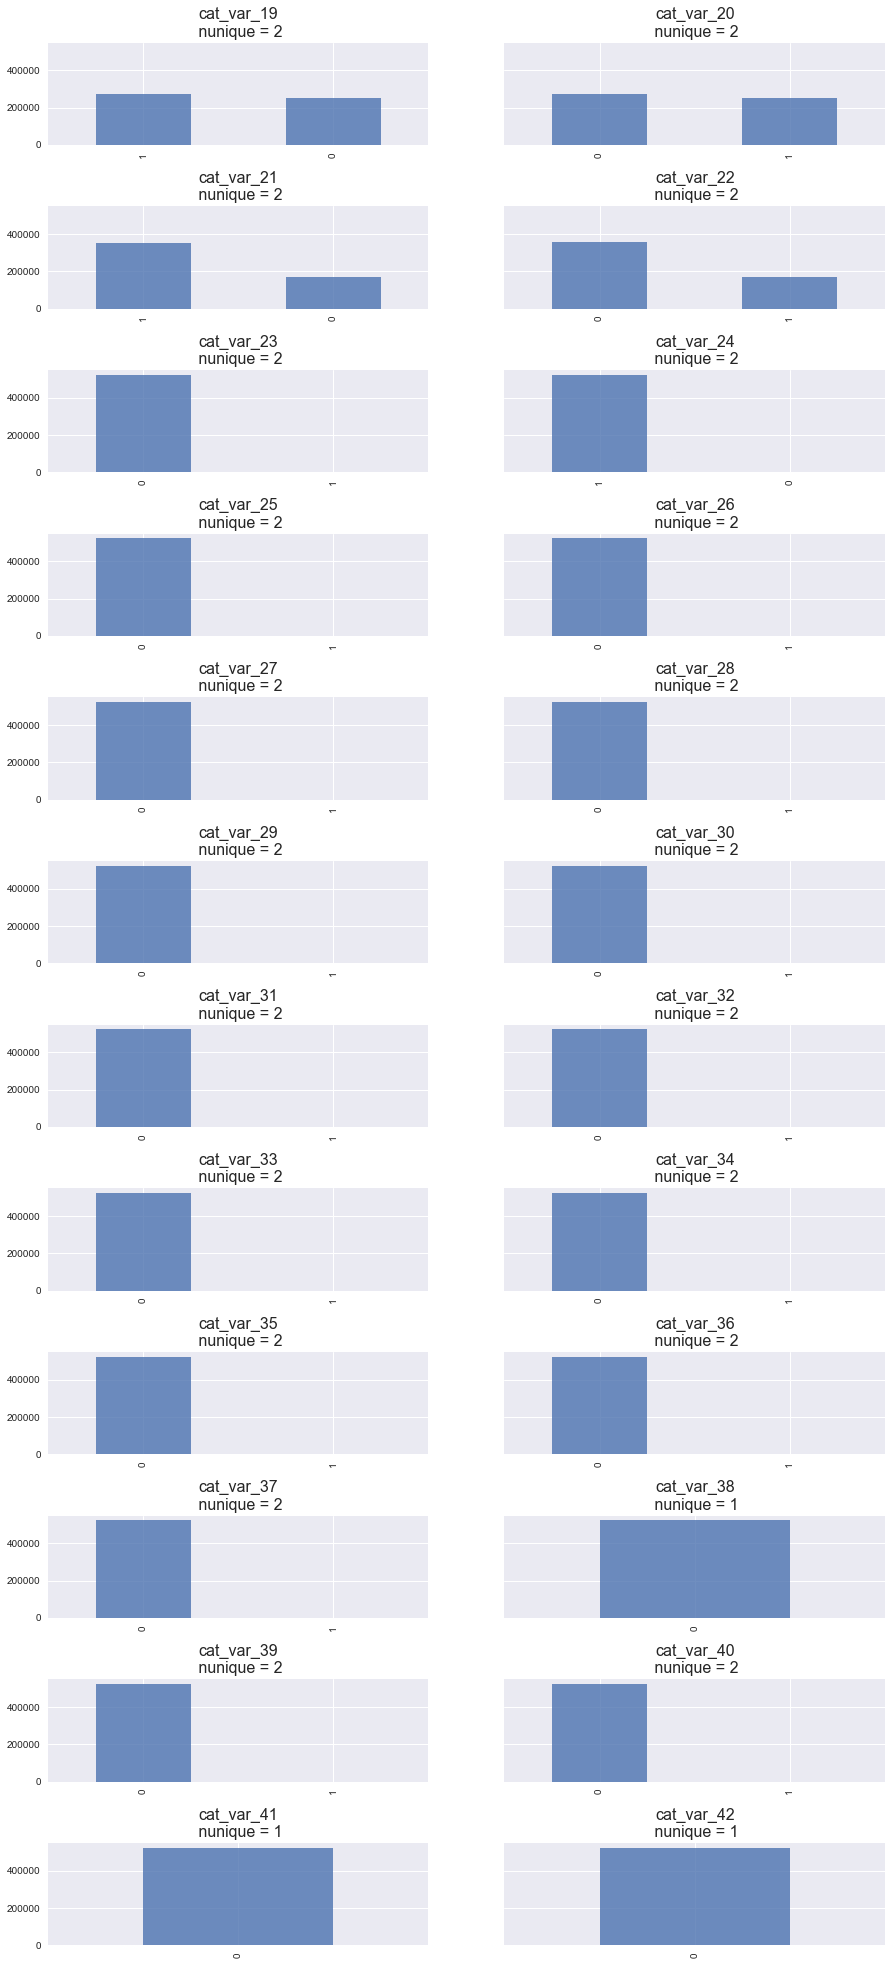

In [21]:
# uncomment the line below and comment out the second line below to see the bar plots with the same y axes
fig, axes = plt.subplots(12, 2, figsize = (15, 35), sharey='all')
#fig, axes = plt.subplots(12, 2, figsize = (15, 35))   # axes is a numpy array of pyplot Axes

for i in range(0,12):
    for j in [0,1]:
        if 18+2*i+j+1 > 42:
            break
        test_new['cat_var_%s' %(18+2*i+j+1)].value_counts().plot(ax = axes[i,j], kind = 'bar', alpha=0.8)
        axes[i,j].set_title('cat_var_%s\n nunique = %s' %(18+2*i+j+1, test_new['cat_var_%s' %(18+2*i+j+1)].nunique()), size = 16)

fig.subplots_adjust(hspace=0.6)

### Takeaways

1. The distributions of categorical variables in training set is similar to the distributions of corresponding categorical variables in test set.  
2. There are several features with only one lcategories.
3. Some categories appear to have more (or equal) fraud observations than normal. For example, *cat_var_2* category **ep**, *cat_var_6* category **mm**, *cat_var_7* category **iq**, *cat_var_8* categories **ln**, **ex** and **jf**. The last ones are small to observe with plots, and there are more similar small groups that look like they have more fraud observations. We will pay attention to this.  


### Playground

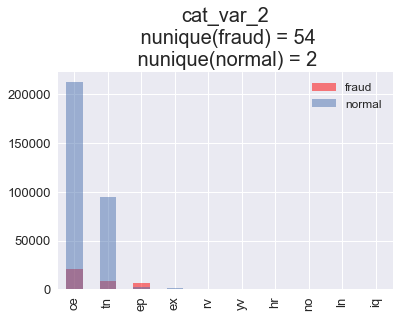

In [22]:
# play with the code bellow to plot only one categorical feature

fraud_cat['cat_var_2'].value_counts().head(10).plot(kind = 'bar', color='red', label='fraud', alpha=0.5)
normal_cat['cat_var_2'].value_counts().head(10).plot(kind = 'bar', label ='normal', alpha = 0.5)
plt.legend(loc='upper right', prop={'size':12})
plt.title('cat_var_2\n nunique(fraud) = %s\n nunique(normal) = %s' % (fraud_cat['cat_var_2'].nunique(), normal_cat['cat_var_24'].nunique()), size = 20)
plt.tick_params(axis='both', which='major', labelsize=13)

In [23]:
#train_new.groupby('cat_var_2')['cat_var_2', 'target'].mean()

In [24]:
### Use this line to see the frequencies of unique values in one feature
#print(train_new['cat_var_7'].value_counts())
#print(train_new['cat_var_8'].value_counts())

### Describe categorical features of type object (cat_var_1 through cat_var_18)
#train_new[cat_vars].iloc[:,:18].describe()

#train_new.groupby('cat_var_7')['cat_var_7', 'target'].mean()

## Removing Features

In [21]:
# Remove features having more than 60 categories (uncomment the corresponding lines to remove)
# Remove features with only one category in both training and test set
cat_vars = [x for x in train_new.columns if 'cat_' in x]

to_remove = []
print('following features will be removed')
for c in cat_vars:
    #if train_new[c].nunique() > 60:
    #    print(c, train_new[c].nunique())
    #    to_remove.append(c)
    #if (train_new[c].nunique() == 1) and (test_new[c].nunique() == 1):
    if test_new[c].nunique()==1:
        print(c, train_new[c].nunique())
        to_remove.append(c)
        
train_less = train_new.drop(to_remove, axis=1)
test_less = test_new.drop(to_remove, axis=1)

following features will be removed
cat_var_38 1
cat_var_41 2
cat_var_42 1


In [22]:
# Remove num_var_3
#train_less = train_less.drop('num_var_3', axis=1)
#test_less = test_less.drop('num_var_3', axis=1)

In [23]:
print('train_less shape:', train_less.shape, 'test_less shape:', test_less.shape)

train_less shape: (348978, 47) test_less shape: (523466, 46)


## Missing Values

In [25]:
# drop rows containing NA values
#train_less = train_less.dropna(axis=0, how='any')
#test_less = test_less.dropna(axis=0, how='any')
#print('train_less Shape:', train_less.shape, 'test_less Shape:', test_less.shape)

# check that there are no missing values left
#train_less.isnull().sum()

In [26]:
# Handle missing values
cat_vars = [x for x in train_less.columns if 'cat_' in x]
for x in cat_vars:
    train_less[x] = train_less[x].fillna('NaN')
    test_less[x] = test_less[x].fillna('NaN')

## Encode Categorical Features

In [27]:
print('Number of unique values in categorical features features')
for col in cat_vars:
    print(col, 'train:',train_less[col].nunique(), 'test:', test_less[col].nunique())

Number of unique values in features
cat_var_1 train: 535 test: 535
cat_var_2 train: 60 test: 62
cat_var_3 train: 617 test: 618
cat_var_4 train: 2 test: 2
cat_var_5 train: 2 test: 2
cat_var_6 train: 518 test: 516
cat_var_7 train: 20 test: 22
cat_var_8 train: 463 test: 464
cat_var_9 train: 5 test: 5
cat_var_10 train: 23 test: 23
cat_var_11 train: 5 test: 5
cat_var_12 train: 5 test: 5
cat_var_13 train: 52 test: 52
cat_var_14 train: 12 test: 12
cat_var_15 train: 2 test: 2
cat_var_16 train: 2 test: 2
cat_var_17 train: 2 test: 2
cat_var_18 train: 2 test: 2
cat_var_19 train: 2 test: 2
cat_var_20 train: 2 test: 2
cat_var_21 train: 2 test: 2
cat_var_22 train: 2 test: 2
cat_var_23 train: 2 test: 2
cat_var_24 train: 2 test: 2
cat_var_25 train: 2 test: 2
cat_var_26 train: 2 test: 2
cat_var_27 train: 2 test: 2
cat_var_28 train: 2 test: 2
cat_var_29 train: 2 test: 2
cat_var_30 train: 2 test: 2
cat_var_31 train: 1 test: 2
cat_var_32 train: 2 test: 2
cat_var_33 train: 2 test: 2
cat_var_34 train: 2 tes

In [33]:
# binary encode only columns that have more than 5 levels
import category_encoders as ce

def encode_categoricals(train, test):
    cat_vars = [x for x in train.columns if x.startswith('cat_var')]
    # add num_var_3 to categorical variables
    #cat_vars.append('num_var_3')
    to_encode = []
    print('categorical columns to encode')
    for col in cat_vars:
        if (train[col].nunique() > 5):
            to_encode.append(col)
            print(col)
    
    # Specify the columns to encode then fit and transform
    encoder = ce.BinaryEncoder(cols=to_encode)
    encoder.fit(train[to_encode], verbose=1)
    train_trans = encoder.transform(train[to_encode])
    test_trans = encoder.transform(test[to_encode])
    
    # add unencoded features and target to the transformed training data frame
    features_to_add_train = [x for x in train.columns if not x in to_encode]
    train_all = pd.concat([train[features_to_add_train], train_trans], axis=1)
    
    # add unencoded features to the transformed test data frame
    features_to_add_test = [x for x in test.columns if not x in to_encode]
    test_all = pd.concat([test[features_to_add_test], test_trans], axis=1)
    
    return (train_all, test_all)

train_all, test_all = encode_categoricals(train_less, test_less)

categorical columns to encode
cat_var_1
cat_var_2
cat_var_3
cat_var_6
cat_var_7
cat_var_8
cat_var_10
cat_var_13
cat_var_14


In [34]:
print('train_all shape:', train_all.shape, 'test_all shape:', test_all.shape)

train_all shape: (348978, 103) test_all shape: (523466, 102)


## Transform Numerical Features

In [42]:
def transform_numericals(train, test):
    num_vars = [col for col in train.columns if 'num_var' in col]
    for col in num_vars:
        if col == 'num_var_2':
            train[col] = train[col] * np.log1p(10**7)
            test[col] = test[col] * np.log1p(10**7)
        else:
            train[col] = np.log1p(train[col] * 10**7)
            test[col] = np.log1p(test[col] * 10**7)
    return (train, test)

# change the names in the next notebook
# there was an error in transform_numericals column and I ran it two times.
# thus the num_var_1 is transformed two times (or maybe 3 times)
# the leaderboard score of 0.73419 is based on this two times transformation of num_var_1
train_all, test_all = transform_numericals(train_all, test_all)

### Visualize numerical features after transformation
### Training set

In [43]:
## numerical feature names
num_vars = [x for x in train_all.columns if 'num_' in x]

# separate fraud and normal numerical columns in two data frames
fraud_num = train_all[train_all.target == 1][num_vars]
normal_num = train_all[train_all.target == 0][num_vars]

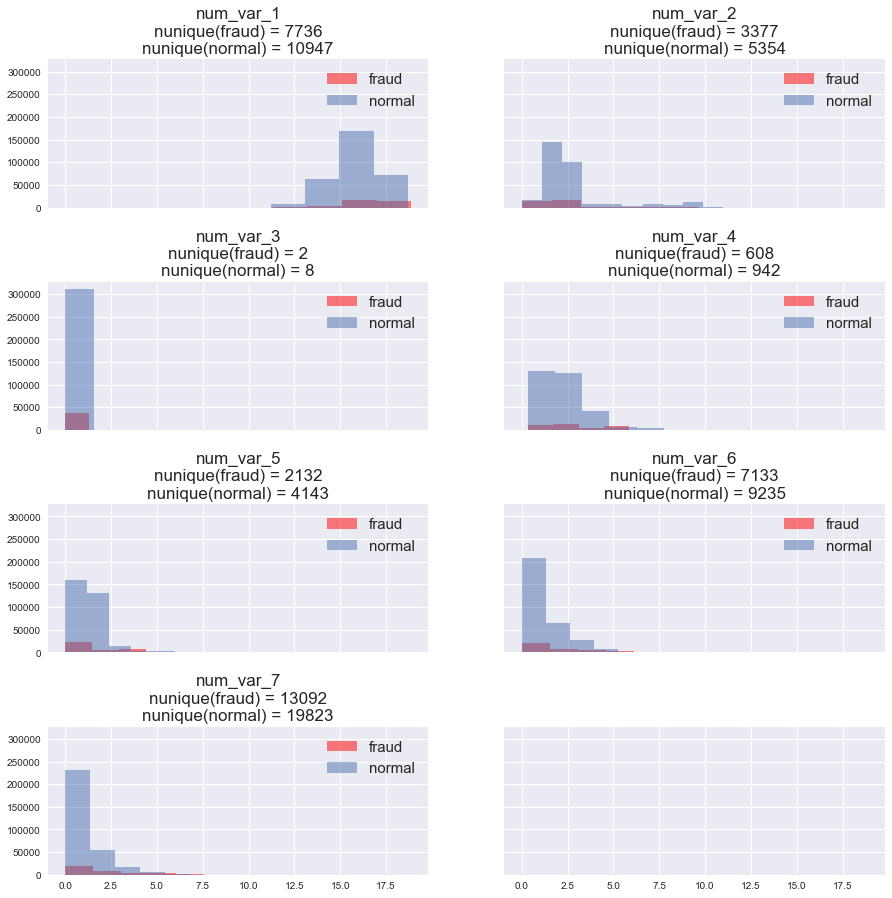

In [44]:
# uncomment the line below and comment out the second line below to see the histograms with the same x and y axes
f, axes = plt.subplots(4, 2, figsize = (15,15), sharex='all', sharey = 'all')
#f, axes = plt.subplots(4, 2, figsize = (15,15))


## we will use for loop to plot all 7 numerical features.
## notice that feature names start from 1, while the plot count starts from 0.
## there are 3 rows and 2 columns of plots.
for i in [0,1,2,3]:
    for j in [0,1]:
        if 2*i+j+1 > 7:
            break
        #if 2*i+j+1 == 3:
        #    continue
        axes[i, j].hist(fraud_num['num_var_%s' %(2*i+j+1)], label = 'fraud', alpha = 0.5, color = 'red')
        axes[i, j].hist(normal_num['num_var_%s' %(2*i+j+1)], label = 'normal', alpha = 0.5)
        axes[i, j].legend(loc='upper right', prop={'size': 15})
        axes[i, j].set_title('num_var_%s\nnunique(fraud) = %s\nnunique(normal) = %s' %(2*i+j+1, fraud_num['num_var_%s' %(2*i+j+1)].nunique(), normal_num['num_var_%s' %(2*i+j+1)].nunique()), size=17)

f.subplots_adjust(hspace=0.5)

### Pairwise relationships between transformed numerical features 

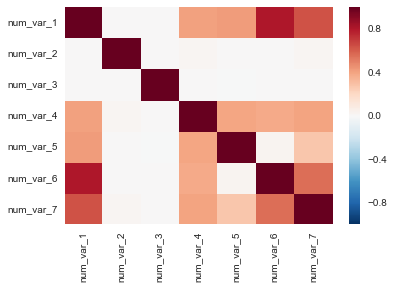

In [52]:
# 2. prettier version
import seaborn as sns
corr = train_less.iloc[:,:7].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

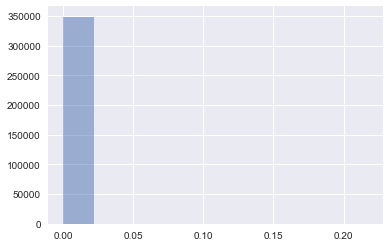

In [53]:
train_less['num_var_5'].hist(alpha=0.5)

In [54]:
#train_less['num_var_4'].value_counts()

### Test set (no labels)

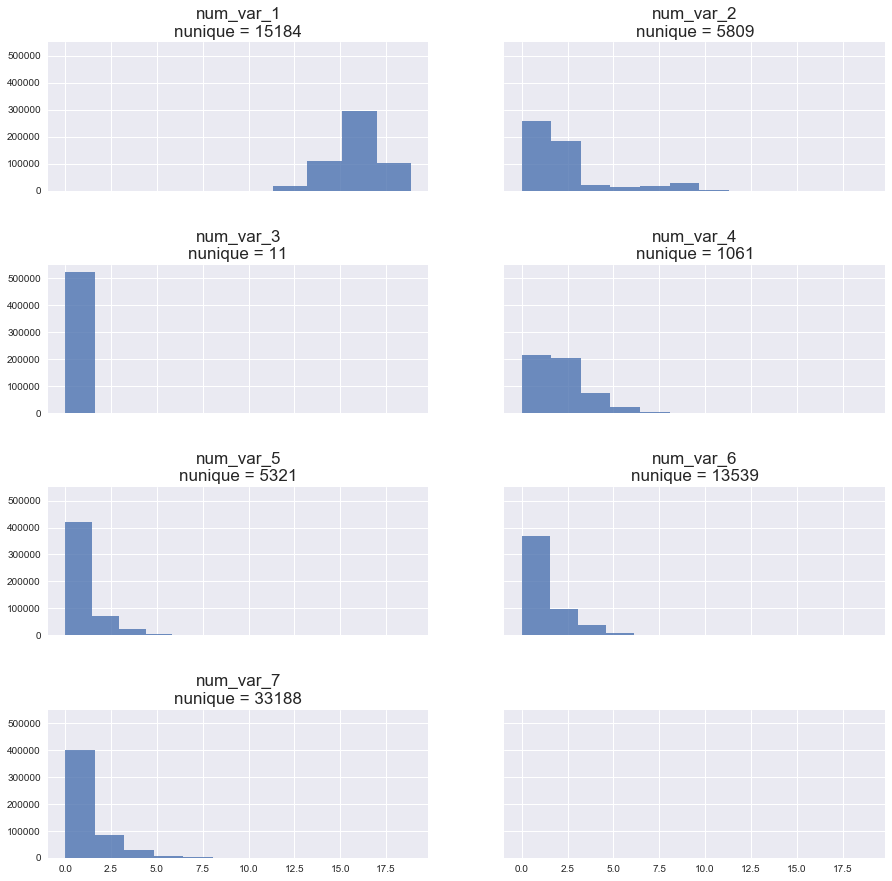

In [56]:
# uncomment the line below and comment out the second line below to see the histograms with the same x and y axes
f, axes = plt.subplots(4, 2, figsize = (15,15), sharex='all', sharey = 'all')
#f, axes = plt.subplots(4, 2, figsize = (15,15))

## we will use for loop to plot all 7 numerical features.
## notice that feature names start from 1, while the plot count starts from 0.
## there are 3 rows and 2 columns of plots.
for i in [0,1,2,3]:
    for j in [0,1]:
        if 2*i+j+1 > 7:
            break
        #if 2*i+j+1 == 3:
        #    continue
        axes[i, j].hist(test_all['num_var_%s' %(2*i+j+1)], alpha = 0.8)
        axes[i, j].set_title('num_var_%s\nnunique = %s' %(2*i+j+1, test_all['num_var_%s' %(2*i+j+1)].nunique()), size=17)

f.subplots_adjust(hspace=0.5)

## New Features

In [57]:
#train_less['num_var_4_5_add'] = train_less['num_var_4'] + train_less['num_var_5']
#train_less['num_var_4_5_sub'] = train_less['num_var_4'] - train_less['num_var_5']
#train_less.drop(['num_var_4', 'num_var_5'], axis=1, inplace=True)

In [58]:
#test_less['num_var_4_5_add'] = test_less['num_var_4'] + test_less['num_var_5']
#test_less['num_var_4_5_sub'] = test_less['num_var_4'] - test_less['num_var_5']
#test_less.drop(['num_var_4', 'num_var_5'], axis=1, inplace=True)

In [60]:
print('train_all shape:', train_all.shape, 'test_all shape:', test_all.shape)

train_all shape: (348978, 103) test_all shape: (523466, 102)


# Starting H20

In [61]:
import h2o
import os
h2o.init(max_mem_size = 2)  ##ses all cores by default                
h2o.remove_all()            #clean slate, in case cluster was already running
#help(h2o)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_121"; Java(TM) SE Runtime Environment (build 1.8.0_121-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from /Users/araks/anaconda/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/cf/tk6mdsb52qn12s0hct45l8gm0000gn/T/tmpvhwe0_8o
  JVM stdout: /var/folders/cf/tk6mdsb52qn12s0hct45l8gm0000gn/T/tmpvhwe0_8o/h2o_araks_started_from_python.out
  JVM stderr: /var/folders/cf/tk6mdsb52qn12s0hct45l8gm0000gn/T/tmpvhwe0_8o/h2o_araks_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.16.0.2
H2O cluster version age:,"21 days, 19 hours and 34 minutes"
H2O cluster name:,H2O_from_python_araks_qp9waj
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [62]:
# import libraries
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
#help(H2OGradientBoostingEstimator)
#help(h2o.import_file)

## Prepare for Modelling

In [64]:
# convert pandas data frames to h2o Frames
train_h2o = h2o.H2OFrame(train_all)
test_h2o = h2o.H2OFrame(test_all)

## Run the two lines below when importing the data from the files directly
#train_h2o = h2o.import_file(os.path.realpath("data_transactions/train.csv"))
#test_h2o = h2o.import_file(os.path.realpath("data_transactions/test.csv"))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [65]:
## Convert categorical columns to factors (don't do this step if categorical columns were encoded before h2o)
#cat_vars = [x for x in train_h2o.col_names if 'cat_' in x]
#for column in cat_vars:
#    train_h2o[column] = train_h2o[column].asfactor()
    
## Convert target variable to categorical
train_h2o['target'] = train_h2o['target'].asfactor()

# Prepare Predictors and Response
predictors_X = [x for x in train_h2o.col_names if not x.startswith('target')]
response_y = 'target'

# split the data (60% trainig, 20% validation, 20% final testing)
train, valid, test = train_h2o.split_frame([0.6, 0.2], seed=1234)

# Fit tree based models

## Random Forest 1

In [66]:
rf_v1 = H2ORandomForestEstimator(
    model_id="rf_v1",
    ntrees=200,
    stopping_rounds=2,
    score_each_iteration=True,
    seed=1000000)

rf_v1.train(predictors_X, response_y, training_frame = train, validation_frame = valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [67]:
print('training score', rf_v1.auc(train = True))
print('validation score', rf_v1.auc(valid = True))

training score 0.7241382481461515
validation score 0.7248814678611649


In [68]:
#print(rf_v1)

In [69]:
# Here we can see the hit ratio table.
#rf_v1.hit_ratio_table(valid = True)

# auc on test set (look at this in the end)
rf_v1_perf = rf_v1.model_performance(test)
auc_rf_v1 = rf_v1_perf.auc()
auc_rf_v1

0.720929220803919

### Look at important variables

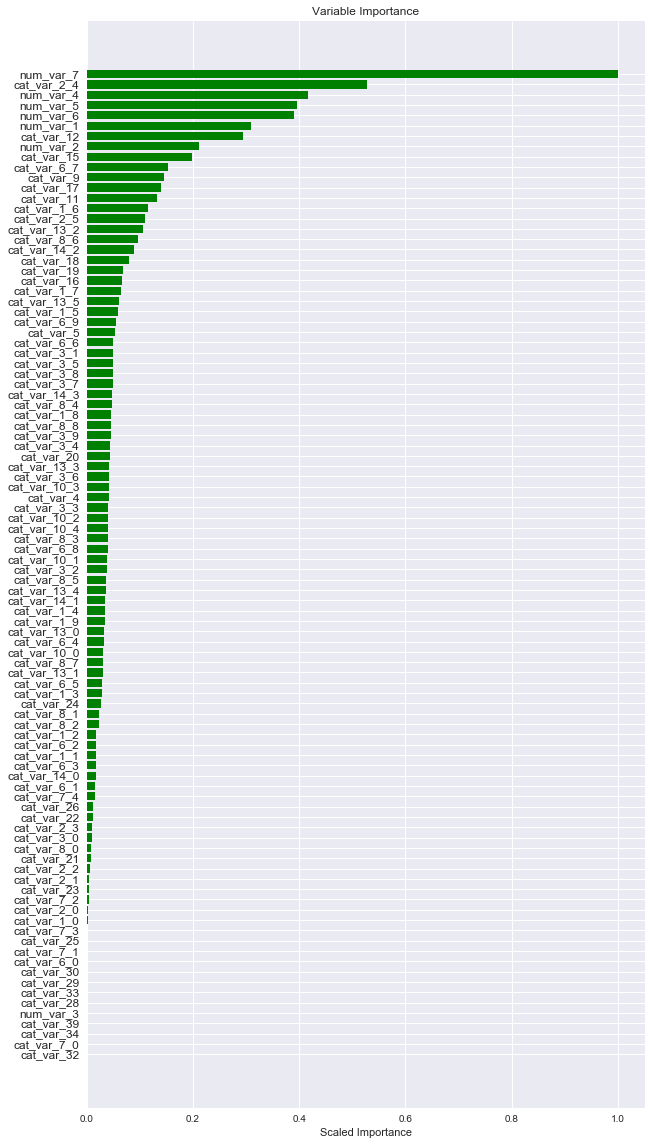

In [70]:
# Plot variable importance from the random forest model
#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,20))
variables = rf_v1._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = rf_v1._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables, size = 12)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

In [71]:
# to see the variables in pandas data frame
imp_vars = rf_v1._model_json['output']['variable_importances'].as_data_frame()
imp_vars

,variable,relative_importance,scaled_importance,percentage
0,num_var_7,28441.187500,1.000000,0.142075
1,cat_var_2_4,14988.367188,0.526995,0.074873
2,num_var_4,11853.929688,0.416787,0.059215
3,num_var_5,11272.861328,0.396357,0.056312
4,num_var_6,11124.474609,0.391140,0.055571
5,num_var_1,8814.985352,0.309937,0.044034
6,cat_var_12,8381.113281,0.294682,0.041867
7,num_var_2,6033.190430,0.212129,0.030138
8,cat_var_15,5661.188477,0.199049,0.028280
9,cat_var_6_7,4345.713867,0.152796,0.021709


In [72]:
# keep only the first 13 variables
vars_to_keep = []
for name in imp_vars.variable[:84]:
    vars_to_keep.append(name)
    
#vars_to_keep

In [73]:
# take the subset of training and test set that contain only these features
train_all_2 = train_all[vars_to_keep].copy()
test_all_2 = test_all[vars_to_keep].copy()
# add target to training set as well as well
train_all_2['target'] = train_all['target']

print('train_all_2 shape:', train_all_2.shape, 'test_all_2 shape:', test_all_2.shape)

train_all_2 shape: (348978, 85) test_all_2 shape: (523466, 84)


In [74]:
# convert to h2o frames
train_h2o_less = h2o.H2OFrame(train_all_2)
test_h2o_less = h2o.H2OFrame(test_all_2)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [75]:
## Convert categorical columns to factors (don't do this step if categorical columns were encoded before h2o)
#cat_vars = [x for x in train_h2o_less.col_names if 'cat_' in x]

#for column in cat_vars:
#    train_h2o_less[column] = train_h2o_less[column].asfactor()
    
## Convert target variable to categorical as well
train_h2o_less['target'] = train_h2o_less['target'].asfactor()

In [76]:
# Prepare predictors and response
predictors_X_less = [x for x in train_h2o_less.col_names if not x.startswith('target')]
response_y_less = 'target'

In [77]:
# split the data (60% trainig, 20% validation, 20% final testing)
train_less, valid_less, test_less = train_h2o_less.split_frame([0.6, 0.2], seed=1234)

## Random Forest 1 (version 2)

In [95]:
rf_v1_2 = H2ORandomForestEstimator(
    model_id="rf_v1_2",
    ntrees=200,
    stopping_rounds=2,
    score_each_iteration=True,
    seed=1000000)

rf_v1_2.train(predictors_X_less, response_y_less, training_frame = train_less, validation_frame = valid_less)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [96]:
print('training score', rf_v1_2.auc(train = True))
print('validation score', rf_v1_2.auc(valid = True))

training score 0.7200013274806443
validation score 0.7207415118693294


In [118]:
rf_v1_2_perf = rf_v1_2.model_performance(test)
auc_rf_v1_2 = rf_v1_2_perf.auc()
auc_rf_v1_2

0.7177822804297396

## Random Forest 2

As the first random forest's result are very comparable to the gbm models' results, let's tune the parameters a little and see what happens.

In [97]:
# takes more than 5 minutes without the stopping conditions

rf_v2 = H2ORandomForestEstimator(
    model_id="rf_v2",
    ntrees=200,
    max_depth=30,
    stopping_rounds=2,    
    stopping_tolerance=0.01,
    score_each_iteration=True,
    seed=3000000)

rf_v2.train(predictors_X_less, response_y_less, training_frame=train_less, validation_frame=valid_less)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [98]:
print('training score', rf_v2.auc(train = True))
print('validation score', rf_v2.auc(valid = True))

training score 0.7190888109261749
validation score 0.7184578818669258


In [119]:
rf_v2_perf = rf_v2.model_performance(test)
auc_rf_v2 = rf_v2_perf.auc()
auc_rf_v2

0.7150962069911877

## GBM 1

Default parameters. As the scores show below, this gbm with defailt parameters is worse than previous random forest. Is it overfitting?

1. Default number of trees - 50
2. Default learning rate - 0.1
3. Default depth - 5

In [100]:
# First we will use all default settings, then make some changes to improve our predictions.
gbm_v1 = H2OGradientBoostingEstimator(
    model_id="gbm_v1",
    seed=2000000
)

gbm_v1.train(predictors_X_less, response_y_less, training_frame = train_less, validation_frame = valid_less)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [101]:
print('training score', gbm_v1.auc(train = True))
print('validation score', gbm_v1.auc(valid = True))

training score 0.7258772770839491
validation score 0.7168610184394928


In [120]:
#gbm_v1.score_history()
#gbm_v1.hit_ratio_table(valid=True)

gbm_v1_perf = gbm_v1.model_performance(test)
auc_gbm_v1 = gbm_v1_perf.auc()
auc_gbm_v1

0.7155945523163729

##  GBM 2

2. increase the learning rate (from default 0.1 to 0.2)
3. increase the depth (from default 5 to 10)

In [78]:
gbm_v2_1 = H2OGradientBoostingEstimator(
    ntrees=50,
    learn_rate=0.2,
    max_depth=10,
    stopping_tolerance=0.01, #10-fold increase in threshold as defined in rf_v1
    stopping_rounds=2,
    score_each_iteration=True,
    model_id="gbm_v2_1",
    seed=2000000
)

gbm_v2_1.train(predictors_X, response_y, training_frame = train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [79]:
print('training score', gbm_v2_1.auc(train = True))
print('validation score', gbm_v2_1.auc(valid = True))

training score 0.768508156618733
validation score 0.722414684027728


In [80]:
#gbm_v2.score_history()
gbm_v2_1_perf = gbm_v2_1.model_performance(test)
auc_gbm_v2_1 = gbm_v2_1_perf.auc()
auc_gbm_v2_1

0.7220757466968699

In [81]:
gbm_v2 = H2OGradientBoostingEstimator(
    ntrees=50,
    learn_rate=0.2,
    max_depth=10,
    stopping_tolerance=0.01, #10-fold increase in threshold as defined in rf_v1
    stopping_rounds=2,
    score_each_iteration=True,
    model_id="gbm_v2",
    seed=2000000
)

gbm_v2.train(predictors_X_less, response_y_less, training_frame = train_less, validation_frame = valid_less)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [82]:
print('training score', gbm_v2.auc(train = True))
print('validation score', gbm_v2.auc(valid = True))

training score 0.7651277438838523
validation score 0.7224940264257808


In [83]:
#gbm_v2.score_history()
gbm_v2_perf = gbm_v2.model_performance(test)
auc_gbm_v2 = gbm_v2_perf.auc()
auc_gbm_v2

0.7212067823459016

## GBM 3

1. Increase learning rate (to 0.3)
2. Use a random 70% of rows to fit each tree (to add the nature of randomness). This will help prevent overfitting
3. Use a random 70% of columns to fit each tree (to add the nature of randomness). Will help prevent overfitting

In [106]:
gbm_v3 = H2OGradientBoostingEstimator(
    ntrees=50,
    learn_rate=0.3,
    max_depth=20,
    sample_rate=0.7,
    col_sample_rate=0.7,
    stopping_rounds=2,
    stopping_tolerance=0.01, #10-fold increase in threshold as defined in rf_v1
    score_each_iteration=True,
    model_id="gbm_v3",
    seed=2000000
)
gbm_v3.train(predictors_X_less, response_y_less, training_frame=train_less, validation_frame=valid_less)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [107]:
print('training score', gbm_v3.auc(train = True))
print('validation score', gbm_v3.auc(valid = True))

training score 0.8803487417946532
validation score 0.717856874223272


In [122]:
gbm_v3_perf = gbm_v3.model_performance(test)
auc_gbm_v3 = gbm_v3_perf.auc()
auc_gbm_v3

0.7173463396252678

## GBM 4

Adding random nature doesn't seem to help overfitting. But we also increased the learning rate on the previous model. So let's bring the learning rate back to 0.2 as in the gbm2 and increase the number of trees.

1. Decrease learning rate (from 0.3 to 0.2)
2. Increase number of trees (from 50 to 70)

In [111]:
gbm_v4 = H2OGradientBoostingEstimator(
    ntrees=70,
    learn_rate=0.2,
    max_depth=20,
    sample_rate=0.7,
    col_sample_rate=0.7,
    stopping_rounds=2,
    stopping_tolerance=0.01, #10-fold increase in threshold as defined in rf_v1
    score_each_iteration=True,
    model_id="gbm_v4",
    seed=2000000
)
gbm_v4.train(predictors_X, response_y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [112]:
print('training score', gbm_v4.auc(train = True))
print('validation score', gbm_v4.auc(valid = True))

training score 0.8959726575557252
validation score 0.722328333640454


In [114]:
#gbm_v4_perf = gbm_v4.model_performance(test)
#auc_gbm_v4 = gbm_v4_perf.auc()
#auc_gbm_v4

0.7192763059158624

# Look at the Misclassified Examples

In [206]:
valid_predictions = rf_v1.predict(valid)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [209]:
# convert predictions into pandas data frame and select only column 'p1'
valid_preds_pandas = h2o.as_list(valid_predictions)
valid_preds = valid_preds_pandas['p1']

# convert validation set into pandas data frame and select only column 'target'
valid_df = h2o.as_list(valid)
valid_labels = valid_df['target']

In [218]:
valid_preds

0        0.061959
1        0.099684
2        0.066467
3        0.061973
4        0.068392
5        0.076009
6        0.065769
7        1.000000
8        0.050681
9        0.060102
10       0.061350
11       0.070119
12       0.064724
13       0.062068
14       0.090976
15       0.066615
16       0.063460
17       0.062185
18       0.155172
19       0.064256
20       0.050984
21       0.001724
22       0.062310
23       0.061293
24       0.055006
25       0.107439
26       0.078733
27       0.060037
28       0.087121
29       0.057858
           ...   
69644    0.063678
69645    0.068106
69646    0.053314
69647    0.071247
69648    0.063491
69649    0.067812
69650    0.062478
69651    0.057237
69652    0.069891
69653    0.059979
69654    0.038858
69655    0.062057
69656    0.050837
69657    0.062057
69658    0.132670
69659    0.061837
69660    0.058269
69661    0.061374
69662    0.833274
69663    0.099905
69664    0.057417
69665    0.062968
69666    0.060107
69667    1.000000
69668    0

In [215]:
# misclassified examples' indecis
misclassified = np.where(valid_labels != valid_preds)
misclassified

(array([    0,     1,     2, ..., 69671, 69672, 69673]),)

In [223]:
np.where(valid_labels != valid_preds)

(array([    0,     1,     2, ..., 69671, 69672, 69673]),)

In [232]:
# misclassified rows
print(valid_labels == 1)
valid_preds = [x for x in valid_preds ]

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
69644    False
69645    False
69646    False
69647    False
69648    False
69649    False
69650    False
69651    False
69652    False
69653    False
69654     True
69655    False
69656    False
69657    False
69658    False
69659    False
69660    False
69661    False
69662     True
69663    False
69664    False
69665    False
69666    False
69667     True
69668    False
69669    False
69670    False
69671    False
69672    False
69673    False
Name: target, Length: 69674, dtype: bool


0        0.061959
1        0.099684
2        0.066467
3        0.061973
4        0.068392
5        0.076009
6        0.065769
7        1.000000
8        0.050681
9        0.060102
10       0.061350
11       0.070119
12       0.064724
13       0.062068
14       0.090976
15       0.066615
16       0.063460
17       0.062185
18       0.155172
19       0.064256
20       0.050984
21       0.001724
22       0.062310
23       0.061293
24       0.055006
25       0.107439
26       0.078733
27       0.060037
28       0.087121
29       0.057858
           ...   
69644    0.063678
69645    0.068106
69646    0.053314
69647    0.071247
69648    0.063491
69649    0.067812
69650    0.062478
69651    0.057237
69652    0.069891
69653    0.059979
69654    0.038858
69655    0.062057
69656    0.050837
69657    0.062057
69658    0.132670
69659    0.061837
69660    0.058269
69661    0.061374
69662    0.833274
69663    0.099905
69664    0.057417
69665    0.062968
69666    0.060107
69667    1.000000
69668    0

# Final Predictions on test set (unlabeled)

## Predict on Test Data

In [85]:
# fit on the whole training set
gbm_v2_1.train(predictors_X, response_y, training_frame=train_h2o)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [86]:
# Convert columns to factors in test data (don't do this step if the data were encoded before h2o)
#cat_vars = [x for x in test_h2o.col_names if 'cat_' in x]

#for column in cat_vars:
#    test_h2o[column] = test_h2o[column].asfactor()

In [87]:
# Make predictions
final_gbm_predictions = gbm_v2_1.predict(test_h2o)

gbm prediction progress: |████████████████████████████████████████████████| 100%


## Understand h2o predictions and convert to pandas data frame

In [88]:
#print(final_gbm_predictions.shape)
#print(final_gbm_predictions.type)

### Interpretation

Stackoverflow explanation comes to help (find the link in references).

p0 is the probability (between 0 and 1) that class 0 is chosen.  
p1 is the probability (between 0 and 1) that class 1 is chosen.

In our problem 1 is Fraudulent, 0 - Not Fraudulent. Then we need the column **p1**.


In [89]:
preds_pandas = h2o.as_list(final_gbm_predictions)

In [90]:
preds = preds_pandas['p1']

## Submission

In [91]:
print(sub_ids.shape)
print(preds.shape)

(523466,)
(523466,)


In [92]:
from IPython.display import FileLink

sub = pd.DataFrame({'transaction_id': sub_ids, 'target': preds})
sub = sub[['transaction_id','target']]    

filename='sub_transactions.csv'
sub.to_csv(filename, index=False)
FileLink(filename)      # lb 0.73419

/Users/araks/Documents/AS_projects/Competitions/hackerearth/BrainWaves2017_18/sub_transactions.csv